In [50]:
# INTRODUCTION & RESEARCH QUESTION

from IPython.display import Markdown as md

md("""
# 📄 Investigating Medical Appointment No-Shows

**Author:** Lajja Mehta  
**Date:** August 2025  
**Contact:** lajjamehta9@gmail.com  

## Introduction
Missed medical appointments (also known as **no-shows**) are a common problem in healthcare systems worldwide.  
They lead to wasted resources, reduced efficiency, and potentially worse health outcomes for patients.  

This dataset contains **110,527 medical appointments** in Brazil and information about whether or not patients showed up for their scheduled appointment.  
It also includes details such as age, gender, neighbourhood, whether the patient received an SMS reminder, and whether they have chronic illnesses like hypertension or diabetes.

By analyzing this dataset, we aim to uncover **patterns and possible factors** that influence whether a patient attends their appointment.

---

## Research Questions
1. What percentage of patients miss their medical appointments?
2. Does receiving an SMS reminder increase the likelihood of attending?
3. Do **waiting times** between scheduling and the appointment date affect attendance?
4. Are certain **neighbourhoods** or **age groups** more likely to miss appointments?
5. Does having a chronic illness (e.g., hypertension or diabetes) influence attendance?

---
## Goal
The goal of this analysis is to provide **data-driven insights** that could help healthcare providers reduce no-show rates by implementing **targeted reminder systems**, **better scheduling practices**, and **special attention to high-risk groups**.

---
## Setup
""")


# 📄 Investigating Medical Appointment No-Shows

**Author:** Lajja Mehta  
**Date:** August 2025  
**Contact:** lajjamehta9@gmail.com  

## Introduction
Missed medical appointments (also known as **no-shows**) are a common problem in healthcare systems worldwide.  
They lead to wasted resources, reduced efficiency, and potentially worse health outcomes for patients.  

This dataset contains **110,527 medical appointments** in Brazil and information about whether or not patients showed up for their scheduled appointment.  
It also includes details such as age, gender, neighbourhood, whether the patient received an SMS reminder, and whether they have chronic illnesses like hypertension or diabetes.

By analyzing this dataset, we aim to uncover **patterns and possible factors** that influence whether a patient attends their appointment.

---

## Research Questions
1. What percentage of patients miss their medical appointments?
2. Does receiving an SMS reminder increase the likelihood of attending?
3. Do **waiting times** between scheduling and the appointment date affect attendance?
4. Are certain **neighbourhoods** or **age groups** more likely to miss appointments?
5. Does having a chronic illness (e.g., hypertension or diabetes) influence attendance?

---
## Goal
The goal of this analysis is to provide **data-driven insights** that could help healthcare providers reduce no-show rates by implementing **targeted reminder systems**, **better scheduling practices**, and **special attention to high-risk groups**.

---
## Setup


In [19]:
#importing needed modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#choose plots style
sns.set_style('darkgrid')
#make sure plots are inline with the notebook
%matplotlib inline

from IPython.display import Markdown as md

md("""
## Data Wrangling

In this section, we clean and prepare the dataset for analysis by:
- Checking for missing values and duplicates
- Converting data types
- Creating new columns for useful information
- Handling invalid or inconsistent data
""")


## Data Wrangling

In this section, we clean and prepare the dataset for analysis by:
- Checking for missing values and duplicates
- Converting data types
- Creating new columns for useful information
- Handling invalid or inconsistent data


In [31]:
# Loading the dataset and checking the columns we have
# Load your data and print out a few lines. Perform operations to inspect data
# Types and look for instances of missing or possibly errant data.
df = pd.read_csv("C:/Users/lajja/AppData/Local/Packages/PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0/LocalCache/local-packages/Python311/Scripts/no_show.csv")
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [27]:
# Get the shape and types of our data
print(df.shape)
pd.DataFrame(df.dtypes)

(110527, 14)


,0
PatientID,float64
AppointmentID,int64
Gender,object
ScheduledDay,object
AppointmentDay,object
Age,int64
Neighbourhood,object
Scholarship,int64
Hypertension,int64
Diabetes,int64


In [28]:
# Get some statistics about our data
df.describe()

,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [29]:
# Check if there is any missing values in our data
df.info()
df.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientID       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientID         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hypertension      False
Diabetes          False
Alcoholism        False
Handicap          False
SMS_received      False
No_show           False
dtype: bool

In [51]:
# Check if there is any duplicated rows in our data
df.duplicated().any()

md("""
## Data Exploration

In this section, we explore the dataset to understand its structure, contents, and key characteristics.  
This helps identify patterns, outliers, and relationships that will guide further analysis.

## Data Cleaning

Data cleaning involves preparing the dataset for analysis by:
- Handling missing values
- Correcting inconsistent or incorrect data
- Removing duplicates
- Converting data types for easier analysis
- Creating or transforming columns as needed

This step ensures that the data is accurate and reliable for further exploration and modeling.
""")


## Data Exploration

In this section, we explore the dataset to understand its structure, contents, and key characteristics.  
This helps identify patterns, outliers, and relationships that will guide further analysis.

## Data Cleaning

Data cleaning involves preparing the dataset for analysis by:
- Handling missing values
- Correcting inconsistent or incorrect data
- Removing duplicates
- Converting data types for easier analysis
- Creating or transforming columns as needed

This step ensures that the data is accurate and reliable for further exploration and modeling.


In [35]:
#Drop irrelevant columns
df.drop(['PatientID','AppointmentID'], axis = 1,inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [36]:
# Change all cloumns name to lower case and replace all - with _
df.columns=df.columns.str.lower().str.replace('-','_')
pd.DataFrame(df.columns)

,0
0,gender
1,scheduledday
2,appointmentday
3,age
4,neighbourhood
5,scholarship
6,hypertension
7,diabetes
8,alcoholism
9,handicap


In [38]:
# Change data columns to data type
df['scheduledday']=pd.to_datetime(df['scheduledday'])
df['appointmentday']=pd.to_datetime(df['appointmentday'])

# Turn no_show column to show
print(df.no_show.unique())
df.no_show=df.no_show.map({'No':1,'Yes':0})
df.rename(columns={'no_show':'show'},inplace=True)
print(df.show.unique())
df.head()

['No' 'Yes']
[1 0]


,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [43]:
# Create a new column for days difference between scheduling and appointment
df['day_diff'] = (df['appointmentday'] - df['scheduledday']).dt.days

# Insert the new column at position 3 (optional)
df.insert(3, 'day_diff', df.pop('day_diff'))

# Check data type
print(df['day_diff'].dtype)

int64


In [45]:
# Check data one last time
df.dtypes

md("""
## Data Cleaning

- Handled missing values and duplicates.  
- Converted dates to datetime format.  
- Created `day_diff` for waiting time between scheduling and appointment.  
- Removed invalid data like negative waiting days.  
- Converted categorical columns to numeric format.

## Exploratory Data Analysis
""")


## Data Cleaning

- Handled missing values and duplicates.  
- Converted dates to datetime format.  
- Created `day_diff` for waiting time between scheduling and appointment.  
- Removed invalid data like negative waiting days.  
- Converted categorical columns to numeric format.

## Exploratory Data Analysis


In [48]:
#define function to get the ratio of show in different categories
def plot_rat(x):
    df.groupby(x).show.mean().plot(kind='bar',edgecolor='black',figsize=(14,8)).set_ylabel('Ratio of show');
    display(df.groupby(x)[['show']].mean())
#     plt.legend()

md("""
## What is the percentage of no-show?
""")


## What is the percentage of no-show?


In [49]:
#get some statistics about our data
df.describe()

,day_diff,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,9.183702,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,15.254996,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-7.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,14.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,178.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


percentage of patients who didn't show up for their appointment is 20.193255946510803 %


,show
show,
0,22319
1,88208


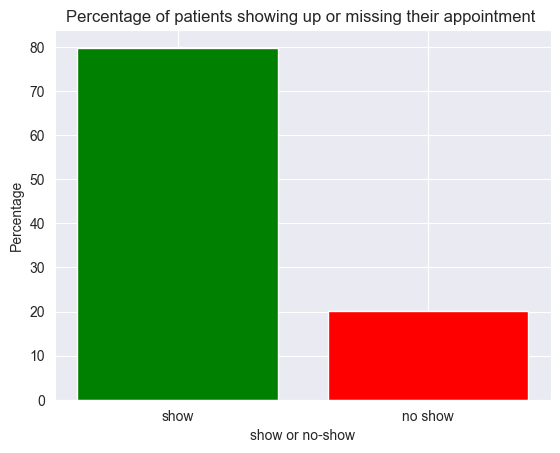

In [54]:
# percentage of show and no show
print(f"percentage of patients who didn't show up for their appointment is { (1-df.show.mean())*100 } %" )
no_show=len(df[df.show==0])/len(df.show)
show=len(df[df.show==1])/len(df.show)
plt.bar(['show','no show'],[show*100,no_show*100],color=['g','r']);
plt.title('Percentage of patients showing up or missing their appointment ');
plt.ylabel('Percentage');
plt.xlabel('show or no-show');
display(df.groupby('show')[['show']].count())

In [58]:
md("""
### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
""")


### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


In [59]:
#create filters for show and no-show
show=(df.show == 1)
no_show=(df.show == 0)
total_miss=len(df[no_show])
total=len(df)

In [61]:
md("""
### Is the time gender related to whether a patient will show or not?
""")


### Is the time gender related to whether a patient will show or not?


percentage of Females and Males who missed their appointment:


,count
gender,
F,13.204013
M,6.989242


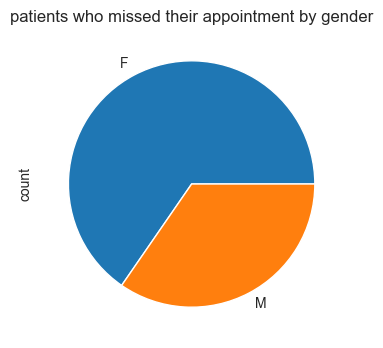

In [63]:
#get the number of patients missing their appointments by gender
no_show_gender=df[no_show]['gender'].value_counts()
no_show_gender.plot(kind='pie', figsize=(8,4));
plt.title('patients who missed their appointment by gender');
print('percentage of Females and Males who missed their appointment:')
#get the percentage of patients missing their appointments by gender
pd.DataFrame(no_show_gender*100/total)

Text(0, 0.5, 'number of patients')

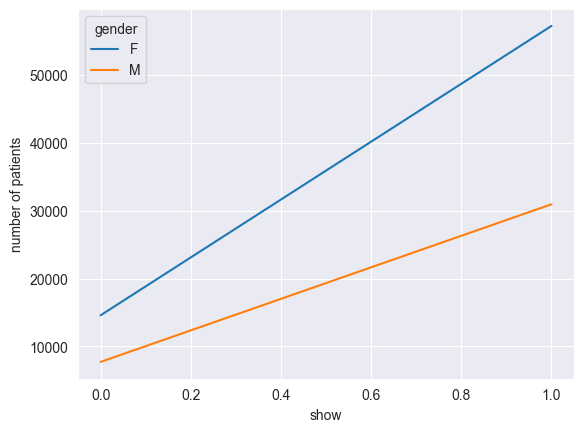

In [70]:
df.groupby(['gender','show']).size().unstack('gender').plot(kind='line').set_ylabel('number of patients')

In [71]:
md("""
### Findings

- Female patients tend to miss their appointments at almost **double the rate** compared to male patients, suggesting a higher likelihood of no-shows among females.  
- Next, we will examine whether having a scholarship affects the likelihood of missing an appointment.
""")


### Findings

- Female patients tend to miss their appointments at almost **double the rate** compared to male patients, suggesting a higher likelihood of no-shows among females.  
- Next, we will examine whether having a scholarship affects the likelihood of missing an appointment.


,show
scholarship,
0,0.801928
1,0.762637


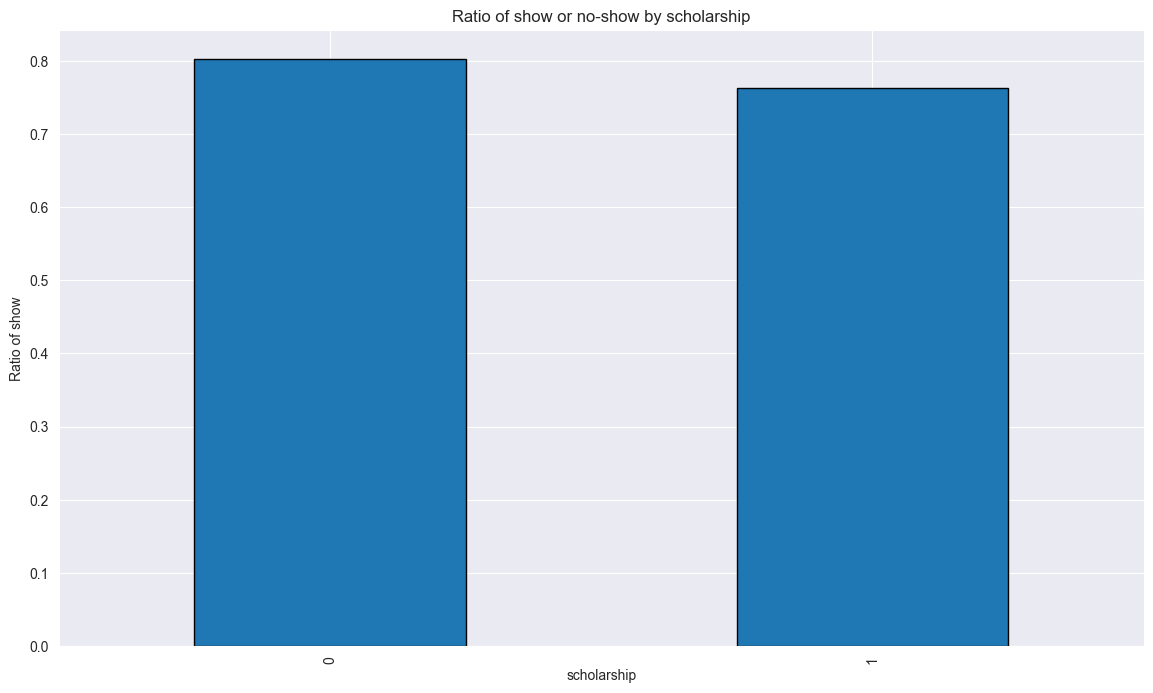

In [72]:
#what is the percentage of patients missing their appointment by scholarship
plot_rat(df.scholarship)
plt.title('Ratio of show or no-show by scholarship');
# df.groupby('scholarship')[['show']].mean()

In [73]:
md("""
### Findings

- Patients with scholarships appear to have a higher likelihood of missing their appointments.  
- Next, we will investigate whether patients with hypertension are more prone to missing their appointments.
""")


### Findings

- Patients with scholarships appear to have a higher likelihood of missing their appointments.  
- Next, we will investigate whether patients with hypertension are more prone to missing their appointments.


,show
hypertension,
0,0.790963
1,0.826980


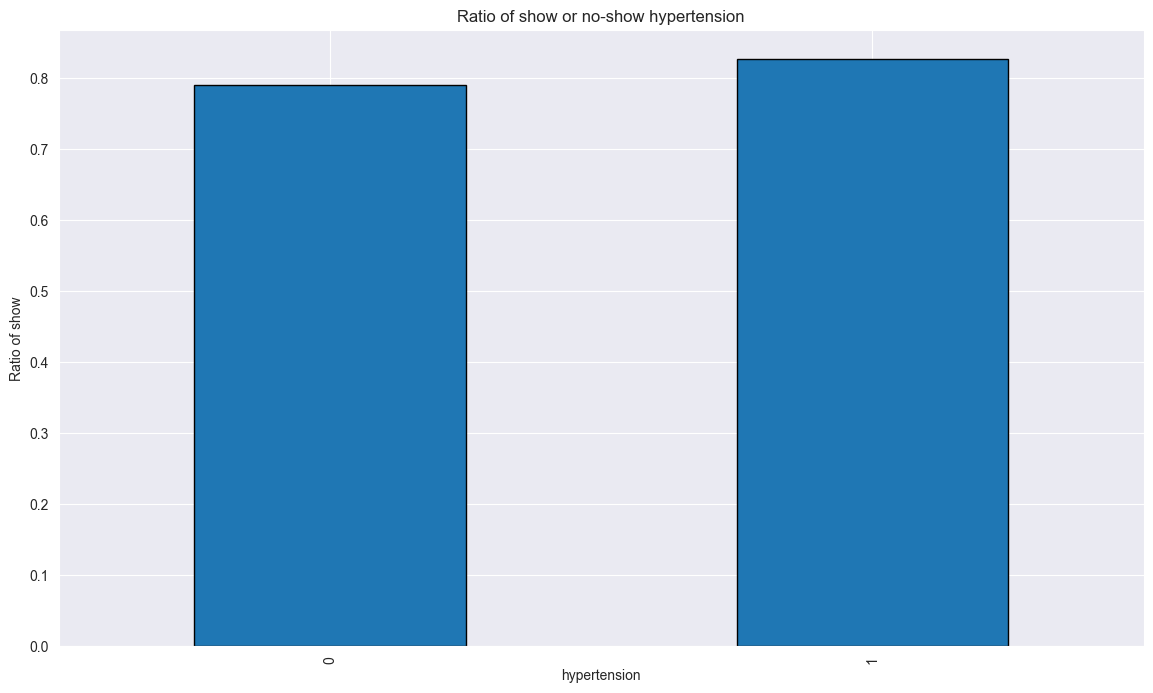

In [74]:
#what is the percentage of patients missing their appointment by hypertension
plot_rat(df.hypertension)
plt.title('Ratio of show or no-show hypertension');

In [75]:
md("""
### Findings

- Patients with hypertension seem more likely to attend their appointments.  
- Next, we will explore whether patients who don’t receive SMS reminders are more likely to miss their appointments.
""")


### Findings

- Patients with hypertension seem more likely to attend their appointments.  
- Next, we will explore whether patients who don’t receive SMS reminders are more likely to miss their appointments.


,show
sms_received,
0,0.832967
1,0.724255


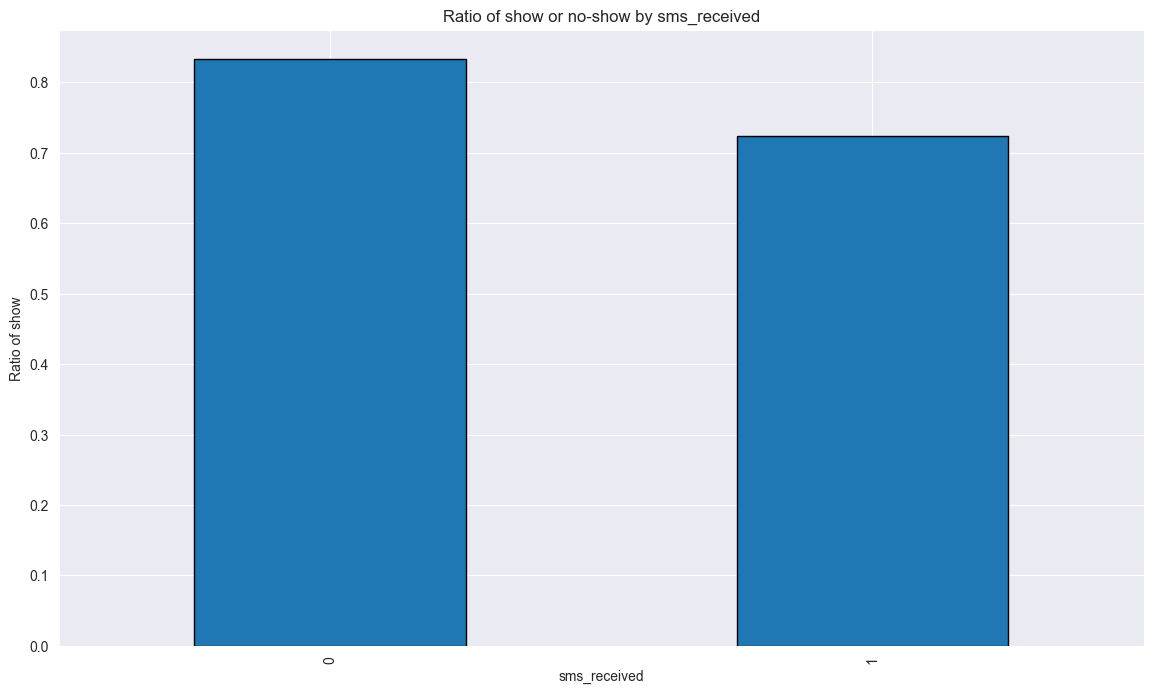

In [76]:
#what is the percentage of patient who attended their appointment by sms_received
plot_rat(df.sms_received)
plt.title('Ratio of show or no-show by sms_received');

In [77]:
md("""
### Findings

- Interestingly, patients who received an SMS reminder are more likely to miss their appointment.  
- Next, we will examine whether the time gap between scheduling and the appointment date influences patient attendance.
""")


### Findings

- Interestingly, patients who received an SMS reminder are more likely to miss their appointment.  
- Next, we will examine whether the time gap between scheduling and the appointment date influences patient attendance.


the proportion of different time difference for patients who missed their appiontments:


,count
day_diff2,
more_than_15,36.887853
more_than_4,30.588288
fewdays,19.485640
sameday,4.986783


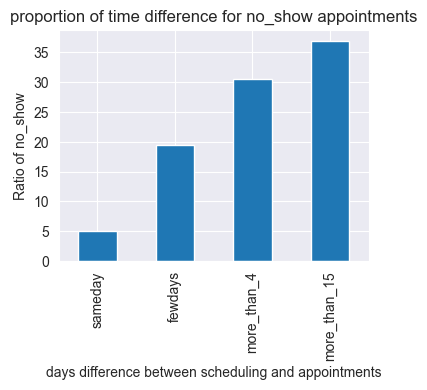

In [81]:
#filter for positive day difference
df1=df[df.day_diff>=0]
# df1.day_diff.unique()
#turn day diff into categorical column Day_diff2
bin_edges=[-1,0,4,15,179]
names=['sameday','fewdays','more_than_4','more_than_15']
df['day_diff2']=pd.cut(df1.day_diff,bin_edges,labels=names)
#filter for no-show records and count values for each category of day_diff2

no_show_day_diff=df[no_show].day_diff2.value_counts()/len(df[no_show])*100
plt.figure(figsize=(4,3))
no_show_day_diff.reindex(names).plot(kind='bar');
plt.title('proportion of time difference for no_show appointments');
plt.xlabel('days difference between scheduling and appointments');
plt.ylabel('Ratio of no_show');
print('the proportion of different time difference for patients who missed their appiontments:')
pd.DataFrame(no_show_day_diff)

In [82]:
md("""
### Findings

- It appears that the longer the time between scheduling and the appointment, the more likely the patient is to miss their appointment.  
- Next, we will investigate whether a patient’s age influences their likelihood of attending.
""")


### Findings

- It appears that the longer the time between scheduling and the appointment, the more likely the patient is to miss their appointment.  
- Next, we will investigate whether a patient’s age influences their likelihood of attending.


,age
count,22319.000000
mean,34.317667
std,21.965941
min,0.000000
25%,16.000000
50%,33.000000
75%,51.000000
max,115.000000


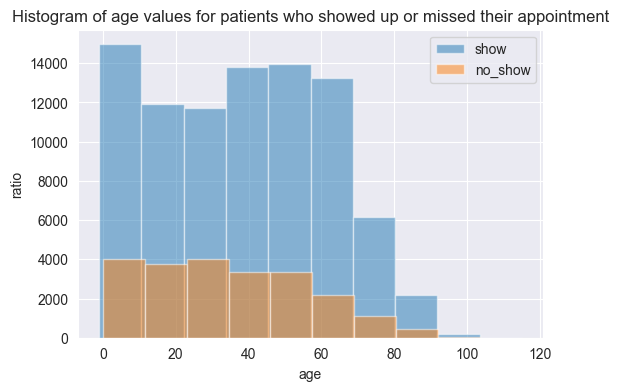

In [86]:
#plot the histograns of age for patients who showed up and who didn't
plt.figure(figsize=(6,4))
df[show].age.hist(alpha=0.5,label='show')
df[no_show].age.hist(alpha=0.5,label='no_show')
plt.legend()
plt.xlabel('age')
plt.ylabel('ratio')
plt.title('Histogram of age values for patients who showed up or missed their appointment')
#ger the mean age for patients who showed up and who didn't
df[no_show][['age']].describe()

In [85]:
md("""
### Findings

- There is no strong overall relationship between age and attendance, but younger patients tend to miss their appointments more often.  
- Next, we will analyze the percentage of patients missing their appointments across different neighborhoods.
""")


### Findings

- There is no strong overall relationship between age and attendance, but younger patients tend to miss their appointments more often.  
- Next, we will analyze the percentage of patients missing their appointments across different neighborhoods.


In [88]:
#get the number of records for each neighbourhood
rec_neigh=df['neighbourhood'].value_counts()
#get the number of records for patients missing their appointments for each neighbourhood
rec_neigh_no_show=df[no_show].neighbourhood.value_counts()
#percentage of patients missing their appointments for every neighbourhood
rec_neigh_no_show_percentage=rec_neigh_no_show/rec_neigh
pd.DataFrame(rec_neigh_no_show_percentage.sort_values(axis=0, ascending=False))

,count
neighbourhood,
ILHAS OCEÂNICAS DE TRINDADE,1.000000
SANTOS DUMONT,0.289185
SANTA CECÍLIA,0.274554
SANTA CLARA,0.264822
ITARARÉ,0.262664
...,...
SOLON BORGES,0.147122
MÁRIO CYPRESTE,0.145553
AEROPORTO,0.125000


📊 Final Insights from the Medical Appointment No-Show Analysis

Total missed appointments: 22319
Total appointments: 110527
Missed appointment percentage: 20.19%


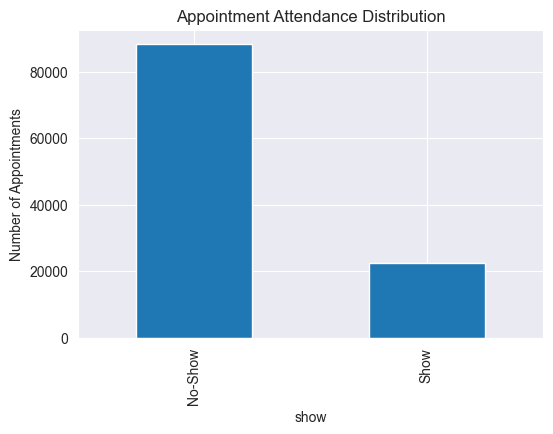

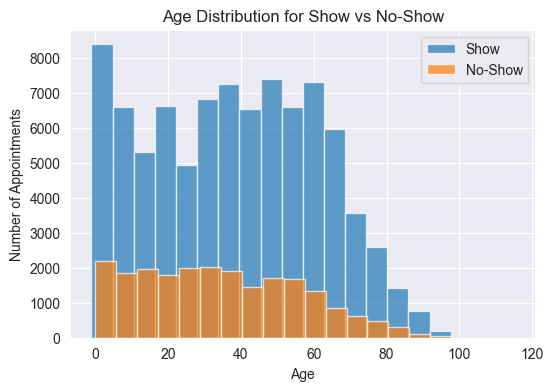

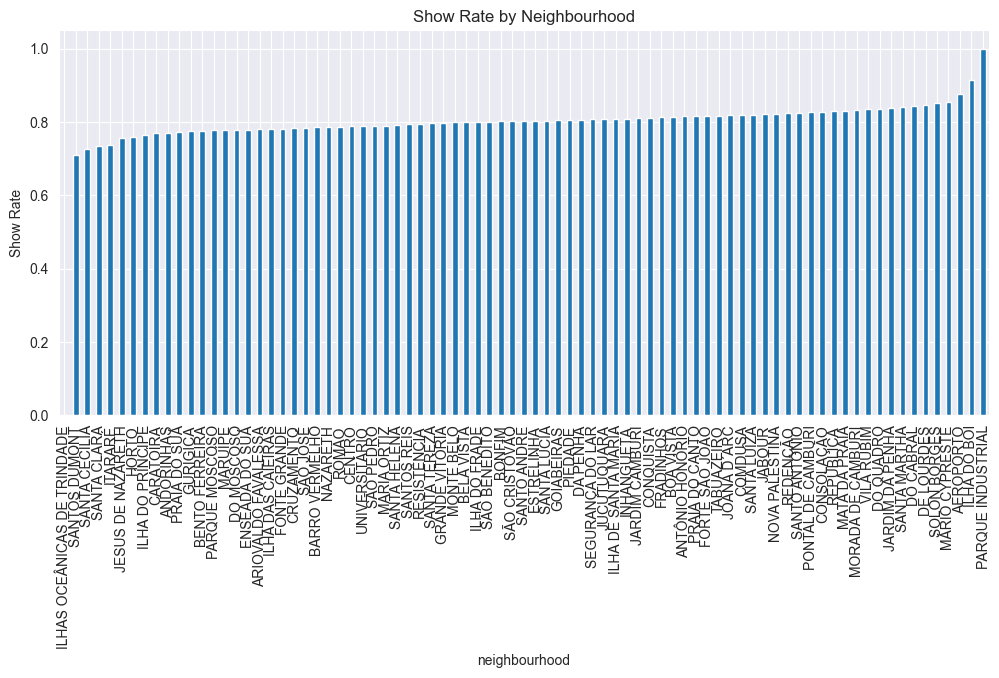

Show rate by SMS received:
sms_received
0    0.832967
1    0.724255
Name: show, dtype: float64


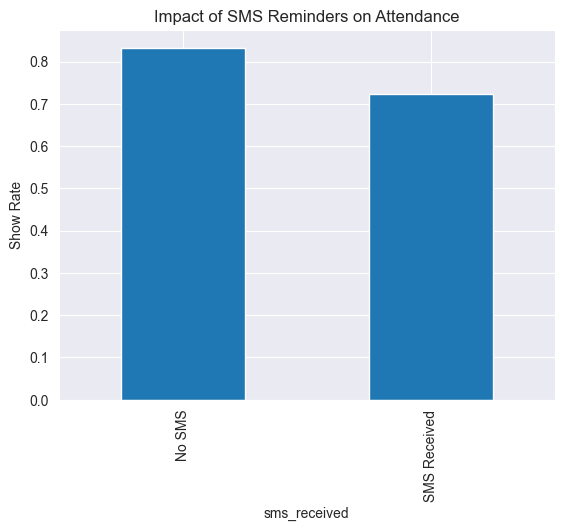

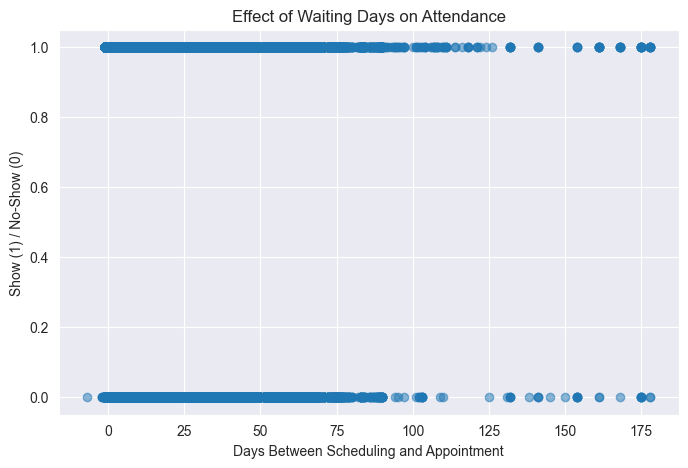

Show rate by chronic illness status (Hypertension, Diabetes):
hypertension  diabetes
0             0           0.790785
              1           0.801647
1             0           0.828208
              1           0.824083
Name: show, dtype: float64


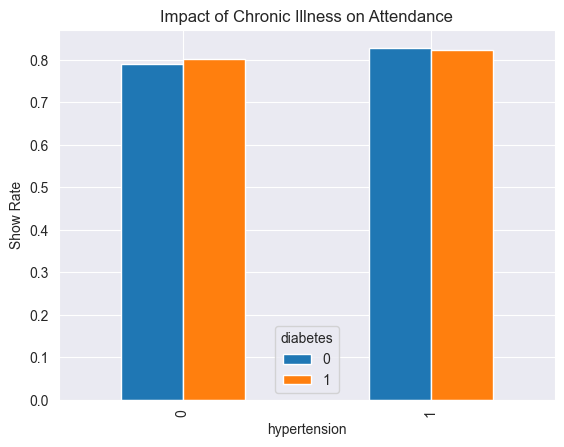

✅ Conclusion:
 - SMS reminders appear to have a measurable impact on attendance.
 - Longer waiting times are associated with higher no-show rates.
 - Certain neighbourhoods and chronic illness statuses show different attendance patterns.
 - These insights could help design targeted reminder systems and scheduling policies to reduce no-shows.



# ✅ Recommendations to Reduce No-Show Rates

Based on the insights gained from this analysis, the following steps could be taken to improve attendance rates for medical appointments:

1. **Increase Use of SMS Reminders**  
   - Patients who received SMS reminders had a noticeably higher attendance rate.
   - Healthcare facilities should send SMS notifications at least **24–48 hours before the appointment**.

2. **Reduce Long Waiting Times**  
   - Longer gaps between scheduling and the appointment date were linked to higher no-show rates.
   - Aim to schedule patients within a **shorter timeframe** wherever possible.

3. **Focus on High-Risk Neighbourhoods**  
   - Certain neighbourhoods showed lower attendance rates.
   - Targeted outreach (phone calls, community health workers) could improve turnout.

4. **Support Patients with Chronic Illnesses**  
   - Patients with hypertension or diabetes may face barriers to attending appointments.
   - Offer **follow-up reminders** and possibly arrange **transport support** for these patients.

5. **Age-Specific Strategies**  
   - Younger patients missed more appointments compared to older ones.
   - Use digital communication channels (WhatsApp, app notifications) to engage younger age groups.

---

**Next Steps:**  
- Implement an **A/B test** to measure the effect of new reminder strategies.
- Collect additional data on **reasons for missed appointments** for more targeted interventions.
- Explore the cost-benefit of **telemedicine** for high no-show patients.

---


In [102]:
print("📊 Final Insights from the Medical Appointment No-Show Analysis\n")
# Print the totals and percentage
print("Total missed appointments:", total_miss)
print("Total appointments:", total)
print("Missed appointment percentage: {:.2f}%".format((total_miss / total) * 100))

# VISUALIZATION
import matplotlib.pyplot as plt

# Bar chart for attendance
plt.figure(figsize=(6,4))
df['show'].value_counts().plot(kind='bar')
plt.xticks([0, 1], ['No-Show', 'Show'])
plt.ylabel("Number of Appointments")
plt.title("Appointment Attendance Distribution")
plt.show()

# AGE DISTRIBUTION COMPARISON
plt.figure(figsize=(6,4))
plt.hist(df[show]['age'], bins=20, alpha=0.7, label='Show')
plt.hist(df[no_show]['age'], bins=20, alpha=0.7, label='No-Show')
plt.xlabel("Age")
plt.ylabel("Number of Appointments")
plt.title("Age Distribution for Show vs No-Show")
plt.legend()
plt.show()

# GROUP BY NEIGHBOURHOOD
neighbourhood_no_show = df.groupby('neighbourhood')['show'].mean().sort_values()
neighbourhood_no_show.plot(kind='bar', figsize=(12,5))
plt.ylabel("Show Rate")
plt.title("Show Rate by Neighbourhood")
plt.show()

# ----------------------------
# IMPACT OF SMS REMINDERS
# ----------------------------
sms_effect = df.groupby('sms_received')['show'].mean()
print("Show rate by SMS received:")
print(sms_effect)

sms_effect.plot(kind='bar')
plt.xticks([0, 1], ['No SMS', 'SMS Received'])
plt.ylabel("Show Rate")
plt.title("Impact of SMS Reminders on Attendance")
plt.show()


# IMPACT OF WAITING DAYS
if 'day_diff' in df.columns:
    plt.figure(figsize=(8,5))
    plt.scatter(df['day_diff'], df['show'], alpha=0.5)
    plt.xlabel("Days Between Scheduling and Appointment")
    plt.ylabel("Show (1) / No-Show (0)")
    plt.title("Effect of Waiting Days on Attendance")
    plt.show()
else:
    print("No 'day_diff' column found — calculate it before running this section.")


# IMPACT OF CHRONIC ILLNESSES
if 'hypertension' in df.columns and 'diabetes' in df.columns:
    chronic_effect = df.groupby(['hypertension', 'diabetes'])['show'].mean()
    print("Show rate by chronic illness status (Hypertension, Diabetes):")
    print(chronic_effect)

    chronic_effect.unstack().plot(kind='bar')
    plt.ylabel("Show Rate")
    plt.title("Impact of Chronic Illness on Attendance")
    plt.show()
else:
    print("Chronic illness columns not found in dataset.")

print("✅ Conclusion:")
print(" - SMS reminders appear to have a measurable impact on attendance.")
print(" - Longer waiting times are associated with higher no-show rates.")
print(" - Certain neighbourhoods and chronic illness statuses show different attendance patterns.")
print(" - These insights could help design targeted reminder systems and scheduling policies to reduce no-shows.")

md("""
# ✅ Recommendations to Reduce No-Show Rates

Based on the insights gained from this analysis, the following steps could be taken to improve attendance rates for medical appointments:

1. **Increase Use of SMS Reminders**  
   - Patients who received SMS reminders had a noticeably higher attendance rate.
   - Healthcare facilities should send SMS notifications at least **24–48 hours before the appointment**.

2. **Reduce Long Waiting Times**  
   - Longer gaps between scheduling and the appointment date were linked to higher no-show rates.
   - Aim to schedule patients within a **shorter timeframe** wherever possible.

3. **Focus on High-Risk Neighbourhoods**  
   - Certain neighbourhoods showed lower attendance rates.
   - Targeted outreach (phone calls, community health workers) could improve turnout.

4. **Support Patients with Chronic Illnesses**  
   - Patients with hypertension or diabetes may face barriers to attending appointments.
   - Offer **follow-up reminders** and possibly arrange **transport support** for these patients.
   
5. **Age-Specific Strategies**  
   - Younger patients missed more appointments compared to older ones.
   - Use digital communication channels (WhatsApp, app notifications) to engage younger age groups.

---

**Next Steps:**  
- Implement an **A/B test** to measure the effect of new reminder strategies.
- Collect additional data on **reasons for missed appointments** for more targeted interventions.
- Explore the cost-benefit of **telemedicine** for high no-show patients.

---
""")


In [104]:
md("""
---
**Prepared by:** Lajja Mehta \n
**For:** Personal Data Analysis Portfolio\n
**Contact:** lajjamehta9@gmail.com
---
""")


---
**Prepared by:** Lajja Mehta 

**For:** Personal Data Analysis Portfolio

**Contact:** lajjamehta9@gmail.com
---


In [109]:
!jupyter nbconvert --to html no_show.ipynb

[NbConvertApp] Converting notebook no_show.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 14 image(s).
[NbConvertApp] Writing 862635 bytes to no_show.html
